In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [3]:
#1: What is a Support Vector Machine (SVM)?

Support Vector Machine (SVM)
A Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks in machine learning. It works by finding the best possible boundary (called a hyperplane) that separates data points of different classes.

Key Concepts of SVM:
1. Hyperplane:

- A decision boundary that separates different classes in the dataset.
- In 2D space, it is a line; in 3D space, it is a plane; and in higher dimensions, it is a hyperplane.

2. Support Vectors:

- These are the data points closest to the hyperplane.
- They determine the position and orientation of the hyperplane.

3. Margin:

- The distance between the hyperplane and the nearest support vectors.
- SVM maximizes this margin to improve classification accuracy.

4. Kernel Trick:

- SVM can handle non-linearly separable data by transforming it into a higher dimension using functions called kernels (e.g., linear, polynomial, radial basis function (RBF)).

Types of SVM:

1. Linear SVM: Used when data is linearly separable.
2. Non-Linear SVM: Used when data is not linearly separable, requiring kernel functions.

In [6]:
#2. What is the difference between Hard Margin and Soft Margin SVM?

Support Vector Machine (SVM) can be classified into Hard Margin SVM and Soft Margin SVM, based on how strictly it separates the data.

1. Hard Margin SVM:

- Used when the data is perfectly separable.
- Finds the best hyperplane with the maximum possible margin.
- Does not allow any misclassification, meaning all data points must be correctly classified.
- Very sensitive to outliers, as even a small noise can make perfect separation impossible.

2. Soft Margin SVM:

- Used when the data is not perfectly separable.
- Allows some misclassification to improve generalization and handle noisy data.
- Introduces a regularization parameter (C) to balance margin size and misclassification.
- More robust to outliers and works better in real-world scenarios.

In [9]:
#3. What is the mathematical intuition behind SVM?

Support Vector Machine (SVM) aims to find the optimal hyperplane that best separates different classes while maximizing the margin between them.

1) Equation of the Hyperplane

A hyperplane in an n-dimensional space is represented as:

w^T * x + b = 0

where:

w = weight vector (normal to the hyperplane)
x = input feature vector
b = bias term
For classification, SVM ensures that:

For positive class (+1): w^T * x_i + b ≥ 1
For negative class (-1): w^T * x_i + b ≤ -1
where y_i represents the class label (+1 or -1).

2) Maximizing the Margin
The margin is defined as:
Margin = 2 / ||w||
SVM maximizes this margin by solving the optimization problem:
Minimize: (1/2) * ||w||²
Subject to: y_i * (w^T * x_i + b) ≥ 1

3) Soft Margin and Slack Variable (ξ_i)
For non-linearly separable data, SVM introduces a slack variable ξ_i to allow misclassification:
y_i * (w^T * x_i + b) ≥ 1 - ξ_i, ξ_i ≥ 0
The new optimization function becomes:
Minimize: (1/2) * ||w||² + C * Σ ξ_i
where C is a regularization parameter controlling the trade-off between margin size and misclassification.

4) Kernel Trick for Non-Linear Data
For non-linearly separable data, SVM uses a kernel function K(x_i, x_j) to transform data into a higher-dimensional space:
φ(x) = K(x_i, x_j)
Common kernel functions:

Linear Kernel: K(x_i, x_j) = x_i^T * x_j
Polynomial Kernel: K(x_i, x_j) = (x_i^T * x_j + c)^d
RBF Kernel: K(x_i, x_j) = exp(-γ ||x_i - x_j||²)
Thus, SVM finds the best hyperplane in the transformed space to separate the data effectively.

In [12]:
#4. What is the role of Lagrange Multipliers in SVM?

Lagrange multipliers help in solving the optimization problem of SVM by transforming it into a dual problem, making it easier to solve, especially for high-dimensional data.

1) Primal Form of SVM Optimization

SVM aims to maximize the margin by minimizing:
Minimize: (1/2) * ||w||²
Subject to: y_i * (w^T * x_i + b) ≥ 1

This is a constrained optimization problem, which is difficult to solve directly.

2) Introducing Lagrange Multipliers

Using Lagrange multipliers (α_i), we convert the problem into an unconstrained optimization problem using the Lagrangian function:

L(w, b, α) = (1/2) * ||w||² - Σ α_i [y_i * (w^T * x_i + b) - 1]

where α_i ≥ 0 are Lagrange multipliers.

In [15]:
#5 What are Support Vectors in SVM?

Support Vectors are the data points closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM). They play a crucial role in defining the optimal hyperplane and maximizing the margin between different classes.

Key Properties of Support Vectors:

- They lie on the margin boundary and influence the decision boundary.
- They determine the hyperplane's position and orientation in the feature space.
- Only these points affect the final model; other points do not contribute directly to the classification boundary.

Mathematical Role of Support Vectors:

For each support vector x_i, the decision function satisfies:
y_i * (w^T * x_i + b) = 1

In the dual form of SVM optimization, only support vectors have non-zero Lagrange multipliers (α_i > 0), meaning:

If α_i > 0, the point is a support vector.
If α_i = 0, the point does not affect the hyperplane.

In [18]:
#6 What is a Support Vector Classifier (SVC)?

A Support Vector Classifier (SVC) is a classification algorithm based on Support Vector Machines (SVM). It finds the optimal hyperplane that separates different classes while allowing some misclassification to improve generalization.

Key Features of SVC:

1. Soft Margin SVM:

- Allows some misclassification using a regularization parameter (C).
- Controls the trade-off between margin size and misclassification errors.

2. Decision Boundary:

- Finds a hyperplane that maximizes the margin between classes.
- Uses support vectors (data points closest to the hyperplane) to define the boundary.

3. Kernel Trick:

- Uses kernels (e.g., linear, polynomial, RBF) to handle non-linear data.

In [21]:
#7 What is a Support Vector Regressor (SVR)?

A Support Vector Regressor (SVR) is an extension of Support Vector Machines (SVM) for regression tasks. Instead of finding a hyperplane that separates classes, SVR finds a function that predicts continuous values while minimizing errors within a margin.

SVR tries to fit a function f(x) that predicts y while allowing some flexibility using ε-insensitive loss. The optimization problem is:

Minimize: (1/2) * ||w||^2

Subject to: | y_i - (w^T * x_i + b) | ≤ ε

where:

- w represents the model weights.
- ε (epsilon) defines a margin where errors are ignored.
- Slack variables ξ, ξ* allow some violations beyond ε for better generalization.

Key Features of SVR
- Uses an ε-insensitive loss function, meaning it only penalizes predictions outside the ε margin.
- Supports different kernels to handle non-linear regression using RBF, polynomial, and linear kernels.
- The C parameter controls model complexity → Large C reduces error but risks overfitting.
- The γ (gamma) parameter in the RBF kernel affects flexibility → Higher γ makes the model more sensitive to small variations.

Types of SVR Kernels

- Linear SVR → Best for simple relationships.
- Polynomial SVR → Captures polynomial trends.
- RBF SVR → Works well for complex, non-linear data.

Applications of SVR
Stock price prediction
House price estimation
Weather forecasting
Energy consumption modeling

Thus, SVR is a powerful regression model that balances flexibility and generalization, making it useful for both simple and complex datasets.

In [24]:
#8 What is the Kernel Trick in SVM?

The Kernel Trick is a technique used in Support Vector Machines (SVM) to handle non-linearly separable data by transforming it into a higher-dimensional space where it becomes linearly separable.

Instead of working directly in the original feature space, SVM uses a kernel function K(x_i, x_j) to compute the dot product in a higher-dimensional space without explicitly transforming the data. Mathematically, this is represented as:

K(x_i, x_j) = φ(x_i) ⋅ φ(x_j)

where φ(x) is a transformation function that maps the data into a higher-dimensional space. This allows SVM to find a linear decision boundary in the transformed space while keeping computations efficient.

Some commonly used kernel functions are:

Linear Kernel:
K(x_i, x_j) = x_i^T * x_j

Polynomial Kernel:
K(x_i, x_j) = (x_i^T * x_j + c)^d

Radial Basis Function (RBF) Kernel:
K(x_i, x_j) = exp(-γ * ||x_i - x_j||^2)

Sigmoid Kernel:
K(x_i, x_j) = tanh(β * x_i^T * x_j + c)

In [27]:
#9 Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?

The choice of a kernel function in Support Vector Machines (SVM) affects the decision boundary and model performance. Here’s a comparison of the Linear Kernel, Polynomial Kernel, and Radial Basis Function (RBF) Kernel:

1) Linear Kernel
Formula:
K(x_i, x_j) = x_i^T * x_j

Characteristics:

- Suitable for linearly separable data.
- Works well when the number of features is large compared to the number of samples.
- Computationally efficient and requires fewer parameters.

When to Use?

- When data is linearly separable or nearly so.
- When interpretability is important (e.g., text classification).

2) Polynomial Kernel
Formula:
K(x_i, x_j) = (x_i^T * x_j + c)^d

Characteristics:

- Maps data into a higher-degree polynomial feature space.
- Degree (d) controls complexity; higher values lead to more complex decision boundaries.
- Can fit curved relationships but may cause overfitting for high-degree values.

When to Use?

- When data has mildly non-linear patterns.
- When a balance between complexity and interpretability is needed.

3) Radial Basis Function (RBF) Kernel
Formula:
K(x_i, x_j) = exp(-γ * ||x_i - x_j||^2)

Characteristics:

- Maps data into an infinite-dimensional feature space.
- γ (gamma) controls how far the influence of a sample extends; high values lead to tighter decision boundaries.
- Handles complex, highly non-linear data but may require tuning γ and C for best results.

When to Use?

- When data is highly non-linear and complex.
- When the decision boundary cannot be represented by polynomials.

In [30]:
#10 What is the effect of the C parameter in SVM?

The C parameter in Support Vector Machines (SVM) controls the trade-off between maximizing the margin and minimizing classification errors. A small C allows a larger margin with some misclassifications, while a large C forces the model to classify all training points correctly, leading to a smaller margin.

The SVM optimization function is:

Minimize: (1/2) * ||w||^2 + C * Σ ξ_i

Where:

- ||w||^2 represents the margin size (smaller w means a larger margin).
- ξ_i are slack variables allowing misclassification.
- C controls the penalty for misclassified points.
- Effect of Different C Values

1. Small C (Low Regularization):

- Allows a larger margin but more misclassifications.
- Focuses on better generalization instead of perfect training accuracy.
- Works well for noisy datasets where some misclassification is acceptable.

2. Large C (High Regularization):

- Forces correct classification of training points, leading to a smaller margin.
- Reduces misclassification but increases overfitting.
- Works well when misclassifications are costly (e.g., medical diagnosis).

Choosing the Right C Value
C too small → Underfitting (model too simple, ignores patterns).
C too large → Overfitting (memorizes training data, poor generalization).
Best C is found using cross-validation to balance accuracy and generalization.
Thus, C acts as a balancing factor between a simple model with a large margin and a complex model that fits training data well.

In [33]:
#11 What is the role of the Gamma parameter in RBF Kernel SVM?

The Gamma (γ) parameter in the Radial Basis Function (RBF) Kernel of Support Vector Machines (SVM) controls how much influence a single training example has on the decision boundary. It determines the spread of the Gaussian function used in the kernel.

Mathematical Definition
The RBF kernel is defined as:

K(x_i, x_j) = exp(-γ * ||x_i - x_j||²)

where:

- γ (gamma) controls the range of influence of each training point.
- ||x_i - x_j||² is the squared Euclidean distance between data points.

Effect of Different Gamma Values
1. Small γ (Low Gamma):

- The Gaussian curve is wide, meaning each training point has a large influence.
- The model is less sensitive to individual points, leading to a smoother decision boundary.
- Works well for simpler, general patterns but may cause underfitting.

2. Large γ (High Gamma):

- The Gaussian curve is narrow, meaning each point has a small influence.
- The model captures fine details, leading to a highly flexible decision boundary.
- Can cause overfitting, making the model too sensitive to noise.

Choosing the Right Gamma Value

- A small γ results in a simple, generalized model.
- A large γ leads to a complex, highly flexible model that may overfit.
- Optimal γ is found using cross-validation to balance accuracy and generalization.
Thus, gamma controls how much influence a training point has, affecting the model’s complexity and ability to generalize.

In [36]:
#12  What is the Naïve Bayes classifier, and why is it called "Naïve"?


The Naïve Bayes classifier is a probabilistic machine learning algorithm based on Bayes' Theorem. It is used for classification tasks and assumes that the features are independent given the class label.

Bayes' Theorem:

The classifier is based on the following formula:

P(Y | X) = ( P(X | Y) * P(Y) ) / P(X)

where:

- P(Y | X) is the probability of class Y given input X (posterior probability).
- P(X | Y) is the probability of input X given class Y (likelihood).
- P(Y) is the probability of class Y (prior probability).
- P(X) is the probability of input X (evidence).

Why Is It Called "Naïve"?

The model is called "Naïve" because it assumes that all features are independent of each other, which is rarely true in real-world data. This simplifies computations but is an unrealistic assumption in many cases.

Advantages of Naïve Bayes

✔ Fast and efficient for large datasets.
✔ Works well with text classification (e.g., spam detection, sentiment analysis).
✔ Performs well even with small datasets.

Limitations

✖ The independence assumption is often unrealistic.
✖ Struggles with correlated features.

In [39]:
#13 What is Bayes’ Theorem?

Bayes' Theorem is a fundamental concept in probability theory that describes how to update the probability of an event based on new evidence. It is widely used in machine learning, statistics, and decision-making.

Mathematical Formula
P(A | B) = ( P(B | A) * P(A) ) / P(B)

where:

- P(A | B) → Probability of event A occurring given that B has occurred (posterior probability).
- P(B | A) → Probability of event B occurring given that A has occurred (likelihood).
- P(A) → Probability of event A occurring (prior probability).
- P(B) → Probability of event B occurring (evidence).

Explanation

Bayes' Theorem helps in updating probabilities when new evidence is introduced. It is particularly useful in classification problems, medical diagnosis, spam detection, and machine learning models like Naïve Bayes.

Example
Suppose a disease affects 1% of a population and a test is 90% accurate. If a person tests positive, Bayes' Theorem can calculate the actual probability that they have the disease, considering the test's false positives and false negatives.

Thus, Bayes' Theorem provides a structured way to update probabilities based on new information.

In [42]:
#14 Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?

1) Gaussian Naïve Bayes (GNB)

✔ Used when features are continuous and assumed to follow a Gaussian (Normal) distribution.

✔ Each feature is modeled using a mean (μ) and variance (σ²).

✔ Probability of a feature x given class C is calculated as:

P(x | C) = (1 / (√(2 * π * σ²))) * exp( - ( (x - μ)² / (2 * σ²) ) )

✔ Suitable for numerical data like age, height, weight, temperature.

Example Use Case: Iris flower classification, weather prediction.

2) Multinomial Naïve Bayes (MNB)
   
✔ Used for discrete data where features represent counts or frequencies of events.

✔ Probability is based on word frequencies in text classification tasks.

✔ The likelihood is computed as:

P(x | C) = ( (x_i + α) / (Σ x + α * N) )


✔ Works well for text classification and document categorization (e.g., spam detection).

Example Use Case: Text classification, sentiment analysis.

3) Bernoulli Naïve Bayes (BNB)

✔ Used for binary (0/1) feature data, where features indicate presence (1) or absence (0) of an attribute.

✔ Unlike Multinomial NB, it considers only binary features rather than frequency counts.

✔ The probability function is:

P(x | C) = p^x * (1 - p)^(1 - x)


✔ Works well for text data represented as binary feature vectors (e.g., word occurrence instead of word count).

Example Use Case: Spam detection, sentiment analysis using binary word presence.

In [45]:
#15 When should you use Gaussian Naïve Bayes over other variants?

When to Use Gaussian Naïve Bayes Over Other Variants

Gaussian Naïve Bayes (GNB) should be used when the features are continuous and follow a normal (Gaussian) distribution. It assumes that each feature is normally distributed within each class.

Situations Where GNB is Preferred

✔ Numerical Data: When the dataset contains continuous values like height, weight, temperature, age, blood pressure, etc., GNB is the best choice.

✔ Assumption of Normality Holds: If the feature distributions appear bell-shaped (Gaussian), GNB will perform well.

✔ Small Datasets: GNB works efficiently with limited data because it only requires estimating the mean (μ) and variance (σ²) for each class.

✔ Fast and Scalable: It is computationally efficient and scales well for real-time applications.

Example Use Cases

Medical Diagnosis → Predicting diseases based on patient parameters like blood pressure and cholesterol levels.

Iris Flower Classification → Using petal and sepal lengths (continuous variables) to classify flower species.

Weather Prediction → Classifying whether it will rain based on temperature and humidity.

Anomaly Detection → Detecting fraudulent transactions by modeling normal behavior with Gaussian distributions.

In [48]:
#16 What are the key assumptions made by Naïve Bayes?

The Naïve Bayes classifier makes several key assumptions to simplify probability calculations and enable efficient classification.

1. Feature Independence Assumption

Naïve Bayes assumes that all features are independent of each other given the class label.

Mathematically, for a set of features x₁, x₂, ..., xₙ, the probability of class C is:

P(C | x₁, x₂, ..., xₙ) ∝ P(C) * P(x₁ | C) * P(x₂ | C) * ... * P(xₙ | C)

In reality, features are often correlated, but Naïve Bayes still performs well in many cases.

2. Class Conditional Independence

Each feature is independent within a given class.

Example: In spam detection, Naïve Bayes assumes that the occurrence of words like "offer" and "discount" in an email is independent given that the email is spam.

3. Equal Importance of Features

- Naïve Bayes assumes that all features contribute equally to the classification decision.
- In real-world problems, some features might be more important than others, but Naïve Bayes does not account for this.

4. Data Follows a Specific Distribution

Different versions of Naïve Bayes assume different data distributions:

- Gaussian Naïve Bayes (GNB) assumes a normal distribution for continuous features.
- Multinomial Naïve Bayes (MNB) assumes a multinomial distribution for word counts.
- Bernoulli Naïve Bayes (BNB) assumes binary features (presence/absence of words).

Implications of These Assumptions

✔ Simplifies computation, making Naïve Bayes fast and efficient.

✔ Works well even if the independence assumption is not perfectly true.

✖ May perform poorly if features are highly correlated.

Thus, Naïve Bayes is a simple yet powerful classifier, but its performance depends on how well the data satisfies these assumptions.

In [51]:
#17 What are the advantages and disadvantages of Naïve Bayes?

Advantages

✔ Fast and Efficient → Naïve Bayes is computationally efficient, even for large datasets, since it requires only simple probability calculations.

✔ Works Well with Small Data → Performs well even when there is limited training data.

✔ Handles High-Dimensional Data → Suitable for applications like text classification and spam filtering where there are many features.

✔ Performs Well Even with Violated Independence Assumption → Despite assuming feature independence, it often gives good results in real-world applications.

✔ Works Well for Text Classification → Frequently used in spam detection, sentiment analysis, and document categorization.

✔ Can Handle Missing Data → Since probabilities are calculated independently for each feature, missing values do not affect performance significantly.

Disadvantages

✖ Strong Independence Assumption → Naïve Bayes assumes that features are independent, which is rarely true in real-world data.

✖ Poor Performance with Correlated Features → If features are highly dependent, Naïve Bayes does not model these dependencies well.

✖ Not Suitable for Complex Relationships → It does not capture interactions between features like decision trees or deep learning models do.

✖ Zero Probability Problem → If a feature value does not appear in the training data for a certain class, it assigns a probability of zero, which can be problematic. This is handled using Laplace smoothing.

✖ Less Interpretable than Decision Trees → While Naïve Bayes is simple, it does not provide clear insights into how each feature contributes to the final decision.

In [54]:
#18 Why is Naïve Bayes a good choice for text classification?

Naïve Bayes is widely used for text classification because of its speed, efficiency, and ability to handle high-dimensional data.

Key Reasons

✔ Works Well with High-Dimensional Data → Text data has thousands of features (words), and Naïve Bayes efficiently handles large vocabularies.

✔ Fast and Scalable → Since it only requires counting word occurrences and applying probability formulas, it is computationally efficient even on large datasets.

✔ Performs Well with Small Data → Works effectively even with limited training examples, making it useful for scenarios where labeled data is scarce.

✔ Robust to Irrelevant Features → Naïve Bayes classifies based on probabilities, so it can handle noisy or less relevant words without much impact.

✔ Handles Class Imbalances Well → Since it is based on probability estimates, it can effectively classify even if some classes have fewer training examples.

✔ Works Well Even if Feature Independence is Not Fully True → While it assumes words appear independently in a document, it still performs well in practice.

In [57]:
#19 Compare SVM and Naïve Bayes for classification tasks?

Support Vector Machine (SVM) and Naïve Bayes (NB) are both popular classification algorithms, but they differ significantly in their approach, performance, and use cases.

1) Working Principle

- SVM → Finds the optimal hyperplane that maximizes the margin between classes.
- Naïve Bayes → Uses Bayes’ Theorem to calculate the probability of each class and assigns the class with the highest probability.

2) Assumptions

SVM → Makes no strict assumptions about the data distribution.
Naïve Bayes → Assumes feature independence and specific probability distributions (Gaussian, Multinomial, Bernoulli).

3) Speed and Complexity

SVM → Computationally expensive, especially for large datasets; training time increases with data size.
Naïve Bayes → Very fast training and prediction since it only requires counting feature occurrences.

4) Interpretability

SVM → Harder to interpret because of complex decision boundaries.
Naïve Bayes → Easy to interpret as it provides direct probabilities for classification.


In [60]:
#20 How does Laplace Smoothing help in Naïve Bayes?

Problem: Zero Probability Issue
In Naïve Bayes, probabilities are calculated based on how often a feature appears in each class. If a feature never appears in the training data for a certain class, its probability becomes zero. Since Naïve Bayes multiplies probabilities, this eliminates the entire class from consideration, which can lead to poor predictions.

Solution: Laplace Smoothing (Add-1 Smoothing)

To fix this, Laplace Smoothing adds a small constant (usually 1) to all feature counts. This ensures that no probability is zero, even if a word or feature is missing in training.

Without smoothing, the probability of a word w given a class C is:

P(w | C) = (count(w, C)) / (total words in C)

With Laplace Smoothing, it becomes:

P(w | C) = (count(w, C) + 1) / (total words in C + V)

where V is the vocabulary size (total unique words in the dataset).

Benefits of Laplace Smoothing
✔ Prevents Zero Probability → Ensures all words/features have a small probability, avoiding class elimination.
✔ Handles Rare or Unseen Words → Useful in text classification where test data may have words missing in training.
✔ Improves Model Stability → Reduces overconfidence in frequent words and makes the model more reliable.

Thus, Laplace Smoothing is essential in Naïve Bayes for handling zero probabilities and ensuring better classification performance.

In [63]:
#21 Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy?

In [65]:

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data 
y = iris.target 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classifier Accuracy: {accuracy:.2f}")


SVM Classifier Accuracy: 1.00


In [67]:
#22 Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies?


In [69]:

from sklearn.datasets import load_wine


wine = load_wine()
X = wine.data 
y = wine.target 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)


y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"SVM with Linear Kernel Accuracy: {accuracy_linear:.2f}")
print(f"SVM with RBF Kernel Accuracy: {accuracy_rbf:.2f}")


if accuracy_linear > accuracy_rbf:
    print("Linear Kernel performed better.")
elif accuracy_rbf > accuracy_linear:
    print("RBF Kernel performed better.")
else:
    print("Both kernels performed equally well.")


SVM with Linear Kernel Accuracy: 0.97
SVM with RBF Kernel Accuracy: 1.00
RBF Kernel performed better.


In [71]:
#23 Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)?


In [73]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data  
y = housing.target  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"SVR Model Mean Squared Error: {mse:.4f}")


SVR Model Mean Squared Error: 0.3201


In [75]:
#24 Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary:


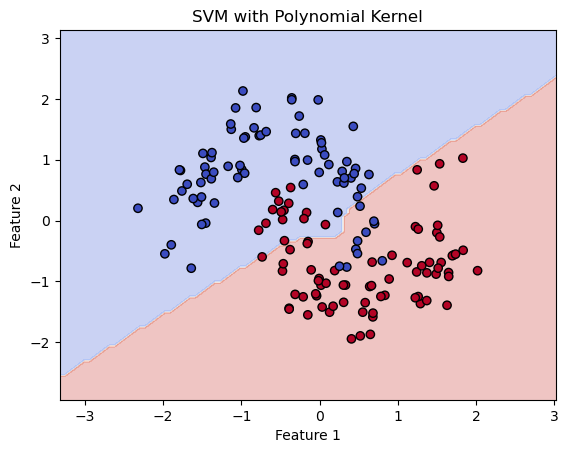

In [77]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.svm import SVC
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM with Polynomial Kernel")
    plt.show()


plot_decision_boundary(svm_poly, X_train, y_train)


In [79]:
#25 Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy?


In [81]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian Naïve Bayes Classifier Accuracy: {accuracy:.2f}")


Gaussian Naïve Bayes Classifier Accuracy: 0.97


In [83]:
#26 Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.


In [85]:
from sklearn.datasets import fetch_20newsgroups
categories = ['rec.sport.baseball', 'sci.med', 'comp.graphics', 'talk.politics.mideast'] 
newsgroups = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
X_train_text, y_train = newsgroups.data, newsgroups.target

newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))
X_test_text, y_test = newsgroups_test.data, newsgroups_test.target

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naïve Bayes Classifier Accuracy: {accuracy:.2f}")


Multinomial Naïve Bayes Classifier Accuracy: 0.91


In [87]:
#27 Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually?


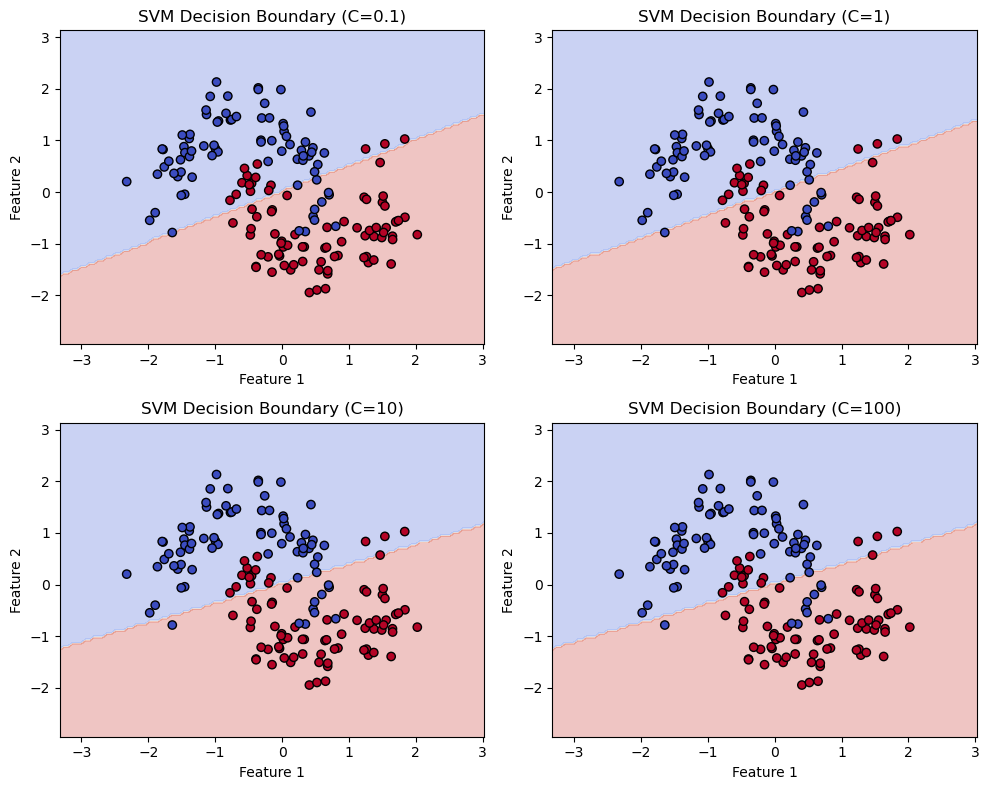

In [95]:

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC

C_values = [0.1, 1, 10, 100]  
models = [SVC(kernel='linear', C=C).fit(X_train, y_train) for C in C_values]

def plot_decision_boundary(model, X, y, C_value):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Predict for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f"SVM Decision Boundary (C={C_value})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Step 6: Plot decision boundaries for different C values
plt.figure(figsize=(10, 8))
for i, (model, C) in enumerate(zip(models, C_values), 1):
    plt.subplot(2, 2, i)
    plot_decision_boundary(model, X_train, y_train, C)

plt.tight_layout()
plt.show()


In [97]:
#28 Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features?


In [99]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, 
                           n_redundant=0, n_classes=2, random_state=42)

X_binary = (X > np.median(X, axis=0)).astype(int) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Bernoulli Naïve Bayes Classifier Accuracy: {accuracy:.2f}")


Bernoulli Naïve Bayes Classifier Accuracy: 0.78


In [103]:
#29 Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data?


In [107]:

from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_unscaled = SVC(kernel='rbf', C=1)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy without Scaling: {accuracy_unscaled:.2f}")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with Scaling: {accuracy_scaled:.2f}")


Accuracy without Scaling: 0.81
Accuracy with Scaling: 1.00


In [109]:
#30  Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing?


In [111]:

from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb_no_smoothing = GaussianNB(var_smoothing=0)  
y_pred_no_smoothing = gnb_no_smoothing.predict(X_test)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
print(f"Accuracy without Laplace Smoothing: {accuracy_no_smoothing:.2f}")

# Step 4: Train Gaussian Naïve Bayes model with Laplace Smoothing
gnb_smoothing = GaussianNB(var_smoothing=1e-9)  # Default Laplace Smoothing
gnb_smoothing.fit(X_train, y_train)
y_pred_smoothing = gnb_smoothing.predict(X_test)
accuracy_smoothing = accuracy_score(y_test, y_pred_smoothing)
print(f"Accuracy with Laplace Smoothing: {accuracy_smoothing:.2f}")


Accuracy without Laplace Smoothing: 1.00
Accuracy with Laplace Smoothing: 1.00


In [113]:
#31 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,gamma, kernel)?


In [119]:

from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],          
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'kernel': ['linear', 'rbf', 'poly']  
}

svm = SVC()


grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: {}".format(grid_search.best_params_))

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {accuracy:.2f}")


Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Test Accuracy with Best Parameters: 0.97


In [121]:
#32 Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy?


In [123]:

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, 
                           weights=[0.9, 0.1], random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score

svm_no_weighting = SVC(kernel='rbf', C=1, random_state=42)
svm_no_weighting.fit(X_train, y_train)
y_pred_no_weighting = svm_no_weighting.predict(X_test)

accuracy_no_weighting = accuracy_score(y_test, y_pred_no_weighting)
balanced_acc_no_weighting = balanced_accuracy_score(y_test, y_pred_no_weighting)

print(f"Accuracy without Class Weighting: {accuracy_no_weighting:.2f}")
print(f"Balanced Accuracy without Class Weighting: {balanced_acc_no_weighting:.2f}")

svm_weighted = SVC(kernel='rbf', C=1, class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
balanced_acc_weighted = balanced_accuracy_score(y_test, y_pred_weighted)

print(f"Accuracy with Class Weighting: {accuracy_weighted:.2f}")
print(f"Balanced Accuracy with Class Weighting: {balanced_acc_weighted:.2f}")


Accuracy without Class Weighting: 0.92
Balanced Accuracy without Class Weighting: 0.70
Accuracy with Class Weighting: 0.89
Balanced Accuracy with Class Weighting: 0.83


In [4]:
#33 Write a Python program to implement a Naïve Bayes classifier for spam detection using email data?

In [12]:


# Sample dataset 
data = {
    "message": [
        "Win a free iPhone now!", "Congratulations, you won a lottery!", 
        "Urgent: Your account has been compromised", "Meeting at 3 PM today",
        "Reminder: Your appointment is tomorrow", "Hello, how are you?",
        "Limited time offer! Buy now!", "Earn $1000 from home", 
        "Let's catch up for lunch", "Your Amazon order has been shipped"
    ],
    "label": [1, 1, 1, 0, 0, 0, 1, 1, 0, 0]  # 1 = spam, 0 = ham
}


df = pd.DataFrame(data)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)


from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Spam Detection Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Spam Detection Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [14]:
#34 Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy?


In [16]:


data = {
    "message": [
        "Win a free iPhone now!", "Congratulations, you won a lottery!", 
        "Urgent: Your account has been compromised", "Meeting at 3 PM today",
        "Reminder: Your appointment is tomorrow", "Hello, how are you?",
        "Limited time offer! Buy now!", "Earn $1000 from home", 
        "Let's catch up for lunch", "Your Amazon order has been shipped"
    ],
    "label": [1, 1, 1, 0, 0, 0, 1, 1, 0, 0]  # 1 = spam, 0 = ham
}

df = pd.DataFrame(data)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

nb_pred = nb_classifier.predict(X_test_tfidf)
svm_pred = svm_classifier.predict(X_test_tfidf)

from sklearn.metrics import accuracy_score, classification_report

nb_accuracy = accuracy_score(y_test, nb_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")

print("\nNaïve Bayes Classification Report:\n", classification_report(y_test, nb_pred))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))


Naïve Bayes Accuracy: 0.50
SVM Accuracy: 0.50

Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [18]:
# therefore accuracy of both the models is same

In [24]:
#35 Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results?


In [26]:


data = {
    "message": [
        "Win a free iPhone now!", "Congratulations, you won a lottery!", 
        "Urgent: Your account has been compromised", "Meeting at 3 PM today",
        "Reminder: Your appointment is tomorrow", "Hello, how are you?",
        "Limited time offer! Buy now!", "Earn $1000 from home", 
        "Let's catch up for lunch", "Your Amazon order has been shipped"
    ],
    "label": [1, 1, 1, 0, 0, 0, 1, 1, 0, 0]  # 1 = spam, 0 = ham
}

df = pd.DataFrame(data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

from sklearn.feature_selection import SelectKBest, chi2

k_best = SelectKBest(score_func=chi2, k=5)
X_train_selected = k_best.fit_transform(X_train_tfidf, y_train)
X_test_selected = k_best.transform(X_test_tfidf)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_pred = nb_classifier.predict(X_test_tfidf)

nb_classifier_selected = MultinomialNB()
nb_classifier_selected.fit(X_train_selected, y_train)
nb_pred_selected = nb_classifier_selected.predict(X_test_selected)

accuracy_before = accuracy_score(y_test, nb_pred)
accuracy_after = accuracy_score(y_test, nb_pred_selected)

print(f"Naïve Bayes Accuracy (Before Feature Selection): {accuracy_before:.2f}")
print(f"Naïve Bayes Accuracy (After Feature Selection): {accuracy_after:.2f}")

print("\nClassification Report (Before Feature Selection):\n", classification_report(y_test, nb_pred))
print("\nClassification Report (After Feature Selection):\n", classification_report(y_test, nb_pred_selected))


Naïve Bayes Accuracy (Before Feature Selection): 0.50
Naïve Bayes Accuracy (After Feature Selection): 0.50

Classification Report (Before Feature Selection):
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Classification Report (After Feature Selection):
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [28]:
#36 Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy?


In [30]:

from sklearn.datasets import load_wine

wine = load_wine()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

svm_ovr = OneVsRestClassifier(SVC(kernel='linear'))
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

from sklearn.multiclass import OneVsOneClassifier

svm_ovo = OneVsOneClassifier(SVC(kernel='linear'))
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"Accuracy of SVM with One-vs-Rest (OvR): {accuracy_ovr:.2f}")
print(f"Accuracy of SVM with One-vs-One (OvO): {accuracy_ovo:.2f}")


Accuracy of SVM with One-vs-Rest (OvR): 1.00
Accuracy of SVM with One-vs-One (OvO): 1.00


In [34]:
#37 Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy?


In [36]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ['linear', 'poly', 'rbf']
accuracies = {}

for kernel in kernels:
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3)  # Polynomial kernel with degree 3
    else:
        model = SVC(kernel=kernel)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[kernel] = accuracy_score(y_test, y_pred)

for kernel, acc in accuracies.items():
    print(f"Accuracy of SVM with {kernel.capitalize()} Kernel: {acc:.2f}")


Accuracy of SVM with Linear Kernel: 0.96
Accuracy of SVM with Poly Kernel: 0.87
Accuracy of SVM with Rbf Kernel: 0.98


In [44]:
#38 Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy?


In [46]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    from sklearn.svm import SVC

    model = SVC(kernel='linear')
    model.fit(X_train, y_train)


    from sklearn.metrics import accuracy_score

    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


average_accuracy = np.mean(accuracies)
print(f"Average Accuracy of SVM Classifier with Stratified K-Fold CV: {average_accuracy:.2f}")


Average Accuracy of SVM Classifier with Stratified K-Fold CV: 0.97


In [48]:
#39 Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance?


In [ ]:
#40 Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy?


In [66]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_without_rfe = accuracy_score(y_test, y_pred)

from sklearn.feature_selection import RFE

rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
accuracy_with_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Accuracy without RFE: {accuracy_without_rfe:.4f}")
print(f"Accuracy with RFE: {accuracy_with_rfe:.4f}")


Accuracy without RFE: 0.9561
Accuracy with RFE: 0.9737


In [ ]:
#41 Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy?


In [64]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.9714
Recall: 0.9577
F1-Score: 0.9645


In [ ]:
#42 Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)?


In [62]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

from sklearn.metrics import log_loss

y_prob = model.predict_proba(X_test)  # Get probability estimates for both classes
logloss = log_loss(y_test, y_prob)

print(f"Log Loss (Cross-Entropy) for Naïve Bayes Classifier: {logloss:.4f}")


Log Loss (Cross-Entropy) for Naïve Bayes Classifier: 0.2051


In [50]:
#43 Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn?

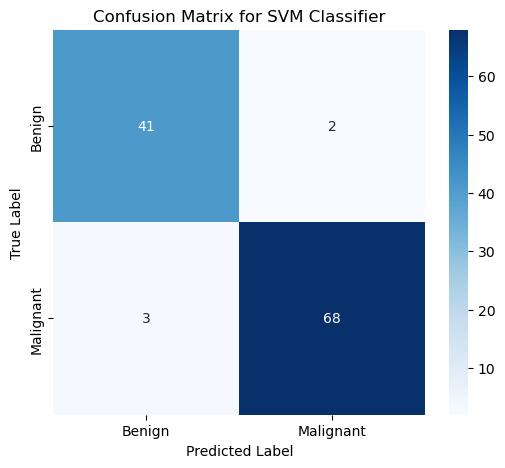

In [60]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()


In [ ]:
#44 Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE?


In [58]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Step 6: Print the MAE Score
print(f"Mean Absolute Error (MAE) for SVR: {mae:.2f}")


Mean Absolute Error (MAE) for SVR: 0.40


In [ ]:
#45 Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score?


In [56]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)


from sklearn.metrics import roc_auc_score

y_scores = model.predict_proba(X_test)[:, 1] 
roc_auc = roc_auc_score(y_test, y_scores)


print(f"ROC-AUC Score for Naïve Bayes Classifier: {roc_auc:.2f}")


ROC-AUC Score for Naïve Bayes Classifier: 1.00


In [52]:
#46 Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve?

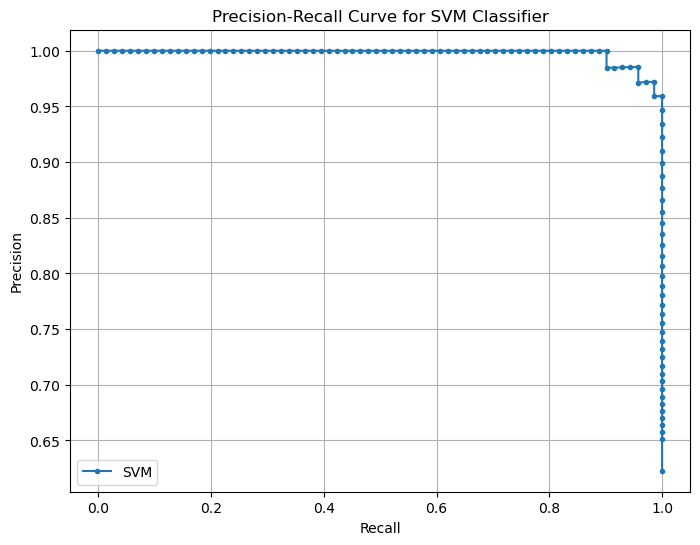

In [54]:

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)  
model.fit(X_train, y_train)


from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class
precisions, recalls, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend()
plt.grid()
plt.show()
